In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
rc('font', family='Malgun Gothic') # 폰트지정
df = pd.read_excel('./시도별 전출입 인구수.xlsx', engine='openpyxl', header=0)
df = df.fillna(method = 'ffill')
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis = 1)
df_seoul.rename({'전입지별' : '전입지'}, axis = 1, inplace = True)
df_seoul.set_index('전입지', inplace = True)

print(df_seoul.head())
print(df_seoul.info())

          1970     1971     1972     1973     1974     1975     1976     1977  \
전입지                                                                             
전국     1448985  1419016  1210559  1647268  1819660  2937093  2495620  2678007   
부산광역시    11568    11130    11768    16307    22220    27515    23732    27213   
대구광역시        -        -        -        -        -        -        -        -   
인천광역시        -        -        -        -        -        -        -        -   
광주광역시        -        -        -        -        -        -        -        -   

          1978     1979  ...     2008     2009     2010     2011     2012  \
전입지                      ...                                                
전국     3028911  2441242  ...  2083352  1925452  1848038  1834806  1658928   
부산광역시    29856    28542  ...    17353    17738    17418    18816    16135   
대구광역시        -        -  ...     9720    10464    10277    10397    10135   
인천광역시        -        -  ...    50493    45392 

In [5]:
col_years = list(map(str, range(1970, 1980))) # 문자열 리스트
sr1 = df_seoul.loc[['충청남도', '경상북도', '강원도'], col_years]
print(sr1)

       1970   1971   1972   1973   1974   1975   1976   1977   1978   1979
전입지                                                                       
충청남도  15954  18943  23406  27139  25509  51205  41447  43993  48091  45388
경상북도  11868  16459  22073  27531  26902  46177  40376  41155  42940  43565
강원도    9352  12885  13561  16481  15479  27837  25927  25415  26700  27599


<ipython-input-11-2f240d7f20f7>:11: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot(col_years, sr1.loc['강원도', :], marker = 'o',\
<ipython-input-11-2f240d7f20f7>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(col_years, rotation = 90)


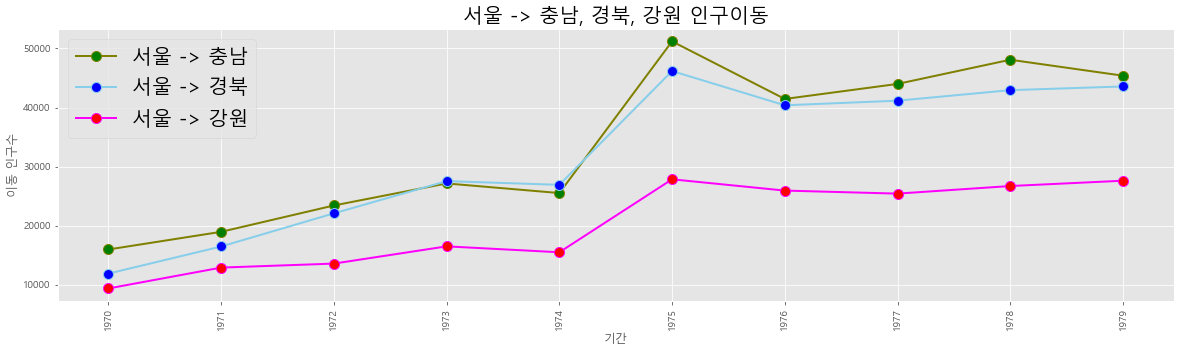

In [11]:
plt.style.use('ggplot') #print(plt.style.available)로 스타일 설정 가능
fig = plt.figure(figsize=(20,5)) # 크기 지정
ax = fig.add_subplot(1,1,1) # 1행1열 1번째

ax.plot(col_years, sr1.loc['충청남도', :], marker = 'o',\
         markerfacecolor = 'green', markersize = 10, color = 'olive',\
        linewidth = 2, label = '서울 -> 충남') # 선그래프
ax.plot(col_years, sr1.loc['경상북도', :], marker = 'o',\
         markerfacecolor = 'blue', markersize = 10, color = 'skyblue',\
        linewidth = 2, label = '서울 -> 경북') # 선그래프
ax.plot(col_years, sr1.loc['강원도', :], marker = 'o',\
         markerfacecolor = 'red', markersize = 10, color = 'magenta',\
        linewidTh = 2, label = '서울 -> 강원') # 선그래프

ax.legend(loc='best', fontsize = 20) # best 최적의 장소, 우상은 그래프로 가리니깐 좌상으로 감
ax.set_title('서울 -> 충남, 경북, 강원 인구이동', size = 20) # 차트 제목
ax.set_ylabel('이동 인구수', size = 12) #  x축 이름
ax.set_xlabel('기간', size = 12)     
ax.set_xticklabels(col_years, rotation = 90)
ax.tick_params(axis = "x", labelsize = 10)
ax.tick_params(axis = "y", labelsize = 10)
plt.show()


In [12]:
col_years = list(map(str, range(2000, 2018))) # 문자열 리스트
sr2 = df_seoul.loc[['경기도','부산광역시'], col_years]
print(sr2)

         2000    2001    2002    2003    2004    2005    2006    2007    2008  \
전입지                                                                             
경기도    435573  499575  516765  457656  400206  414621  449632  431637  412408   
부산광역시   15968   16128   16732   16368   15559   15915   17079   17182   17353   

         2009    2010    2011    2012    2013    2014    2015    2016    2017  
전입지                                                                            
경기도    398282  410735  373771  354135  340801  332785  359337  370760  342433  
부산광역시   17738   17418   18816   16135   16153   17320   17009   15062   14484  


<ipython-input-13-9c0cd4be9b34>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(col_years, rotation = 90)


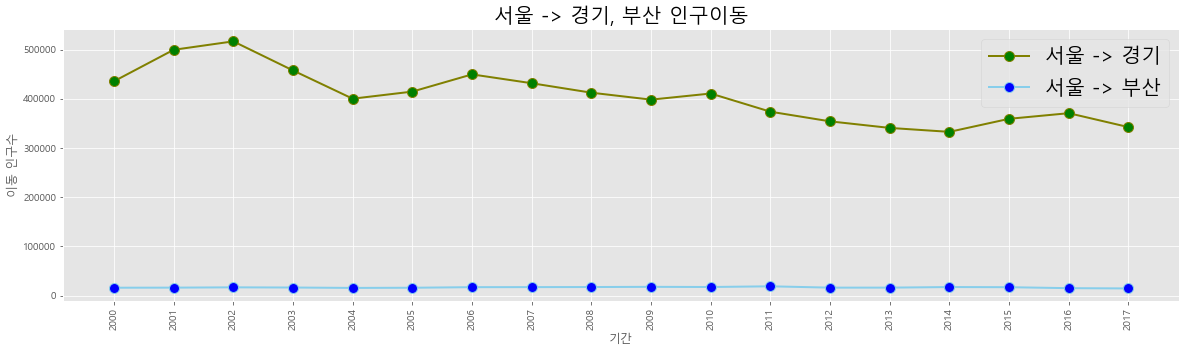

In [13]:
plt.style.use('ggplot') #print(plt.style.available)로 스타일 설정 가능
fig = plt.figure(figsize=(20,5)) # 크기 지정
ax = fig.add_subplot(1,1,1) # 1행1열 1번째

ax.plot(col_years, sr2.loc['경기도', :], marker = 'o',\
         markerfacecolor = 'green', markersize = 10, color = 'olive',\
        linewidth = 2, label = '서울 -> 경기') # 선그래프
ax.plot(col_years, sr2.loc['부산광역시', :], marker = 'o',\
         markerfacecolor = 'blue', markersize = 10, color = 'skyblue',\
        linewidth = 2, label = '서울 -> 부산') # 선그래프


ax.legend(loc='best', fontsize = 20) # best 최적의 장소, 우상은 그래프로 가리니깐 좌상으로 감
ax.set_title('서울 -> 경기, 부산 인구이동', size = 20) # 차트 제목
ax.set_ylabel('이동 인구수', size = 12) #  x축 이름
ax.set_xlabel('기간', size = 12)     
ax.set_xticklabels(col_years, rotation = 90)
ax.tick_params(axis = "x", labelsize = 10) # x축의 라벨 크기, 문자 크기
ax.tick_params(axis = "y", labelsize = 10)
plt.show()

In [43]:
# 그림판 여러개 그래프 작성
col_years = list(map(str, range(1970, 2018))) # 문자열 리스트
sr3 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'], col_years]
print(sr3)

       1970   1971   1972   1973   1974   1975   1976   1977   1978   1979  \
전입지                                                                          
충청남도  15954  18943  23406  27139  25509  51205  41447  43993  48091  45388   
경상북도  11868  16459  22073  27531  26902  46177  40376  41155  42940  43565   
강원도    9352  12885  13561  16481  15479  27837  25927  25415  26700  27599   
전라남도  10513  16755  20157  22160  21314  46610  46251  43430  44624  47934   

      ...   2008   2009   2010   2011   2012   2013   2014   2015   2016  \
전입지   ...                                                                  
충청남도  ...  27458  24889  24522  24723  22269  21486  21473  22299  21741   
경상북도  ...  15425  16569  16042  15818  15191  14420  14456  15113  14236   
강원도   ...  23668  23331  22736  23624  22332  20601  21173  22659  21590   
전라남도  ...  16601  17468  16429  15974  14765  14187  14591  14598  13065   

       2017  
전입지          
충청남도  21020  
경상북도  12464  
강원도   21016  
전라남도

<ipython-input-23-9b3f0f66eb9c>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(col_years, rotation = 90)
<ipython-input-23-9b3f0f66eb9c>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(col_years, rotation = 90)
<ipython-input-23-9b3f0f66eb9c>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(col_years, rotation = 90)
<ipython-input-23-9b3f0f66eb9c>:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(col_years, rotation = 90)


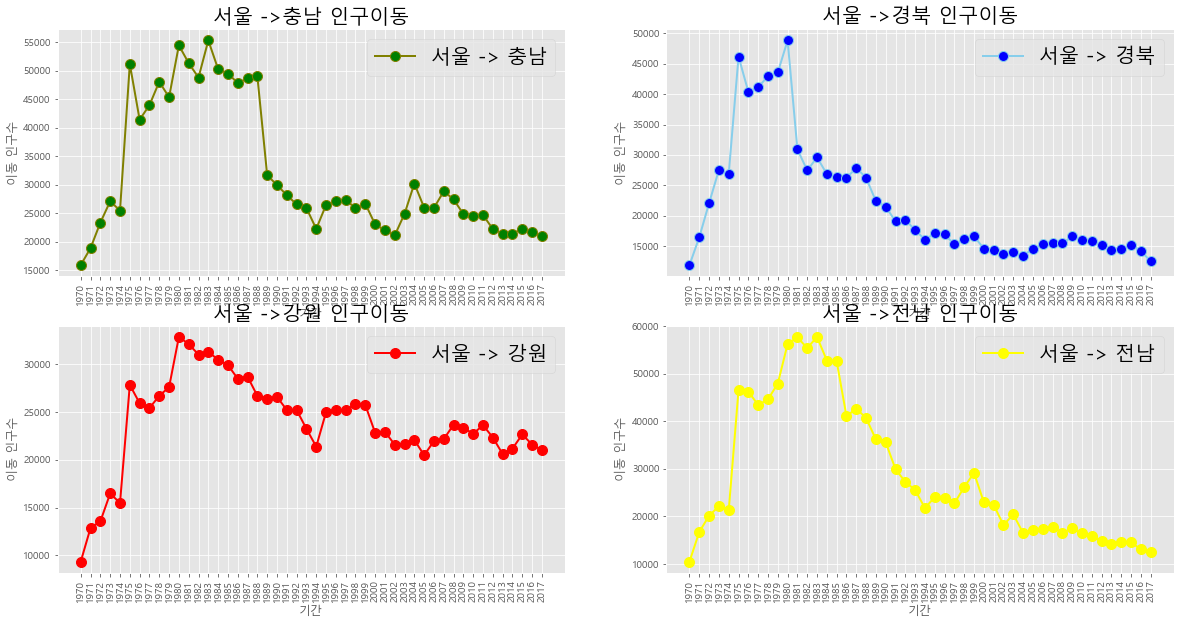

In [23]:
plt.style.use('ggplot') #print(plt.style.available)로 스타일 설정 가능
fig = plt.figure(figsize=(20,10)) # 크기 지정
ax1 = fig.add_subplot(2,2,1) # 1행1열 1번째
ax2 = fig.add_subplot(2,2,2) # 1행1열 1번째
ax3 = fig.add_subplot(2,2,3) # 1행1열 1번째
ax4 = fig.add_subplot(2,2,4) # 1행1열 1번째
ax1.plot(col_years, sr3.loc['충청남도', :], marker = 'o',\
         markerfacecolor = 'green', markersize = 10, color = 'olive',\
        linewidth = 2, label = '서울 -> 충남') # 선그래프
ax2.plot(col_years, sr3.loc['경상북도', :], marker = 'o',\
         markerfacecolor = 'blue', markersize = 10, color = 'skyblue',\
        linewidth = 2, label = '서울 -> 경북') # 선그래프
ax3.plot(col_years, sr3.loc['강원도', :], marker = 'o',\
         markerfacecolor = 'red', markersize = 10, color = 'red',\
        linewidth = 2, label = '서울 -> 강원') # 선그래프
ax4.plot(col_years, sr3.loc['전라남도', :], marker = 'o',\
         markerfacecolor = 'yellow', markersize = 10, color = 'yellow',\
        linewidth = 2, label = '서울 -> 전남') # 선그래프

ax1.legend(loc='best', fontsize = 20)
ax2.legend(loc='best', fontsize = 20)
ax3.legend(loc='best', fontsize = 20)
ax4.legend(loc='best', fontsize = 20)

ax1.set_title('서울 ->충남 인구이동', size = 20) # 차트 제목
ax2.set_title('서울 ->경북 인구이동', size = 20) # 차트 제목
ax3.set_title('서울 ->강원 인구이동', size = 20) # 차트 제목
ax4.set_title('서울 ->전남 인구이동', size = 20) # 차트 제목

ax1.set_ylabel('이동 인구수', size = 12) #  x축 이름
ax1.set_xlabel('기간', size = 12)     
ax2.set_ylabel('이동 인구수', size = 12) #  x축 이름
ax2.set_xlabel('기간', size = 12)     
ax3.set_ylabel('이동 인구수', size = 12) #  x축 이름
ax3.set_xlabel('기간', size = 12)     
ax4.set_ylabel('이동 인구수', size = 12) #  x축 이름
ax4.set_xlabel('기간', size = 12)     

ax1.set_xticklabels(col_years, rotation = 90)
ax2.set_xticklabels(col_years, rotation = 90)
ax3.set_xticklabels(col_years, rotation = 90)
ax4.set_xticklabels(col_years, rotation = 90)

ax1.tick_params(axis = "x", labelsize = 10) # x축의 라벨 크기, 문자 크기
ax1.tick_params(axis = "y", labelsize = 10)
ax2.tick_params(axis = "x", labelsize = 10) # x축의 라벨 크기, 문자 크기
ax2.tick_params(axis = "y", labelsize = 10)
ax3.tick_params(axis = "x", labelsize = 10) # x축의 라벨 크기, 문자 크기
ax3.tick_params(axis = "y", labelsize = 10)
ax4.tick_params(axis = "x", labelsize = 10) # x축의 라벨 크기, 문자 크기
ax4.tick_params(axis = "y", labelsize = 10)

plt.show()

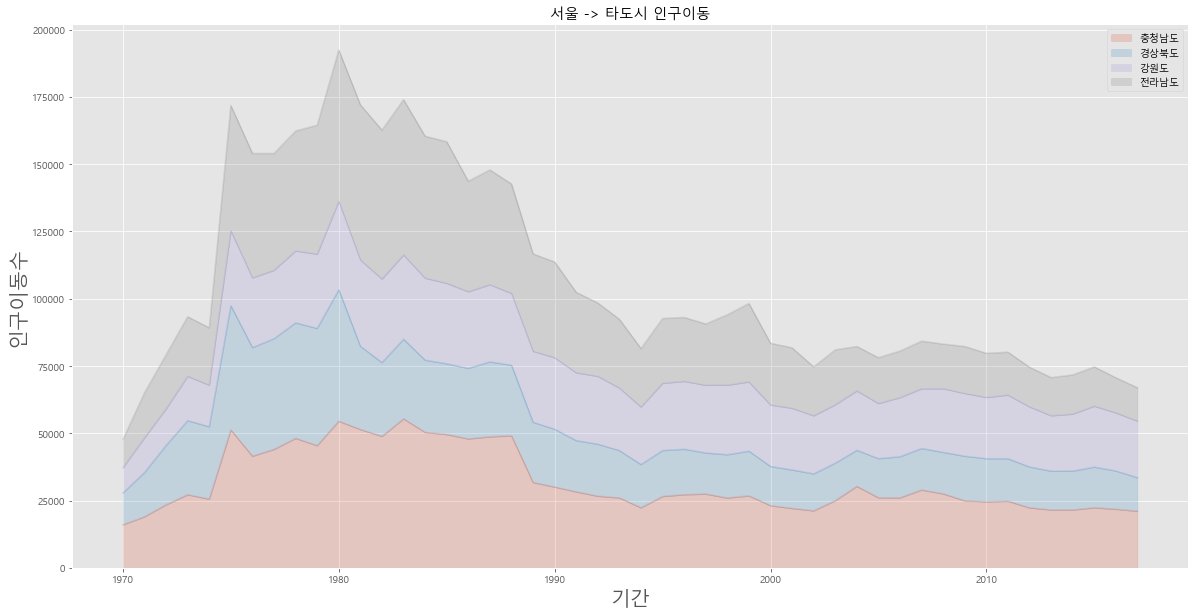

In [27]:
# 면적그래프 area 선그래프 작성시 선과 x축 공간 을 색으로 표시
sr4 = sr3.T

plt.style.use('ggplot')
# T 된 년도가 인덱스
sr4.index = sr4.index.map(int)
# area 그래프 작성 // 메모리 구조 스택 LIFO T 쌓여진 형태 // F 겹쳐진 혀애
sr4.plot(kind = 'area', stacked = True, alpha= 0.2, figsize = (20,10)) # alpha 투명도
plt.title('서울 -> 타도시 인구이동')
plt.ylabel('인구이동수',size = 20)
plt.xlabel('기간',size = 20)
plt.legend(loc='best')
plt.show()

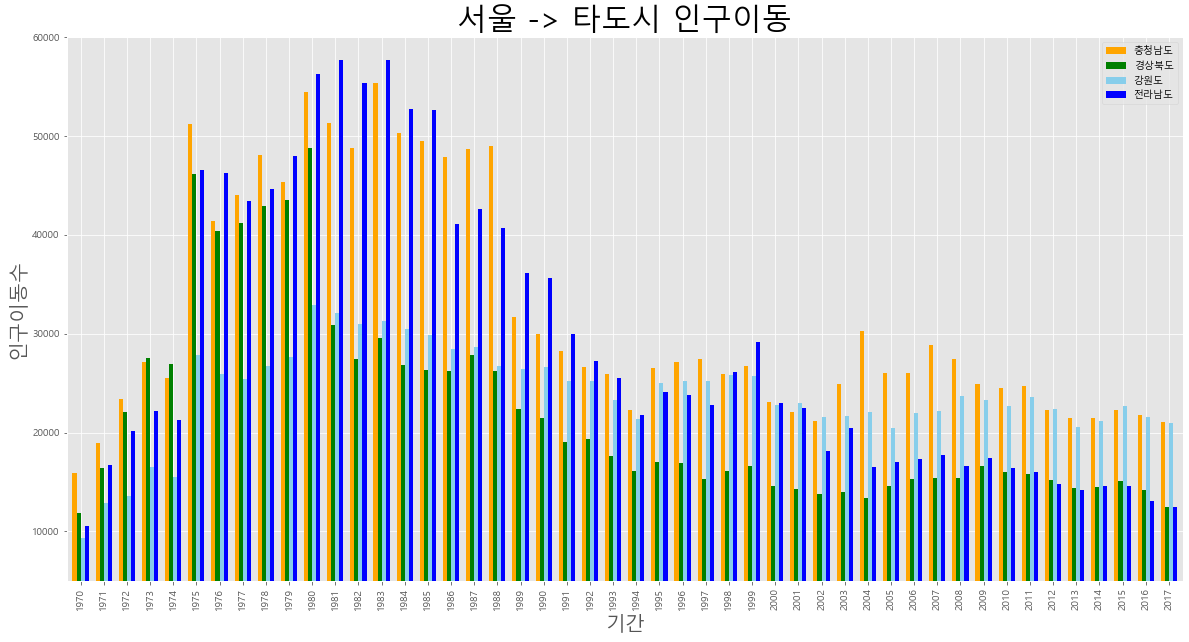

In [29]:
# 막대그래프
plt.style.use('ggplot')
# area 그래프 작성 // 메모리 구조 스택 LIFO T 쌓여진 형태 // F 겹쳐진 혀애
sr4.plot(kind = 'bar', figsize = (20,10), width = 0.7, color=['orange','green','skyblue','blue']) # alpha 투명도
plt.title('서울 -> 타도시 인구이동', size= 30)
plt.ylabel('인구이동수',size = 20)
plt.xlabel('기간',size = 20)
plt.ylim(5000,60000)
plt.legend(loc='best')
plt.show()


In [40]:
# 그림판 여러개 그래프 작성
col_years = list(map(str, range(2000, 2017))) # 문자열 리스트
sr5 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'], col_years]
print(sr3)

전입지
충청남도    23083
경상북도    14576
강원도     22832
전라남도    22969
Name: 2000, dtype: object


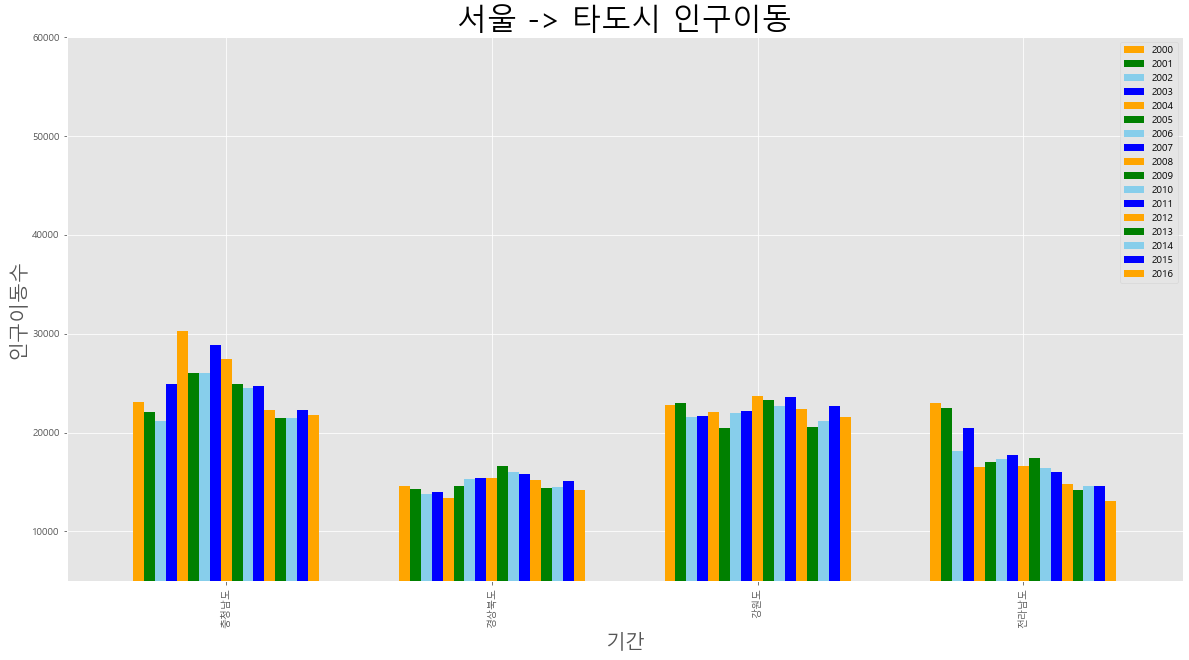

In [41]:
# 막대그래프
plt.style.use('ggplot')
# area 그래프 작성 // 메모리 구조 스택 LIFO T 쌓여진 형태 // F 겹쳐진 혀애
sr5.plot(kind = 'bar', figsize = (20,10), width = 0.7, color=['orange','green','skyblue','blue']) # alpha 투명도
plt.title('서울 -> 타도시 인구이동', size= 30)
plt.ylabel('인구이동수',size = 20)
plt.xlabel('기간',size = 20)
plt.ylim(5000,60000)
plt.legend(loc='best')
plt.show()

In [48]:
#가로 막대그래프
# print(sr3.sum(axis=1))
sr3['합계'] = sr3.sum(axis=1)
print(sr3['합계'])
# 합계 내림차순
sr3_tot = sr3[['합계']].sort_values(by='합계', ascending=True)
print(sr3_tot)

전입지
충청남도    6117092.0
경상북도    4208700.0
강원도     4585100.0
전라남도    5526628.0
Name: 합계, dtype: float64
             합계
전입지            
경상북도  4208700.0
강원도   4585100.0
전라남도  5526628.0
충청남도  6117092.0


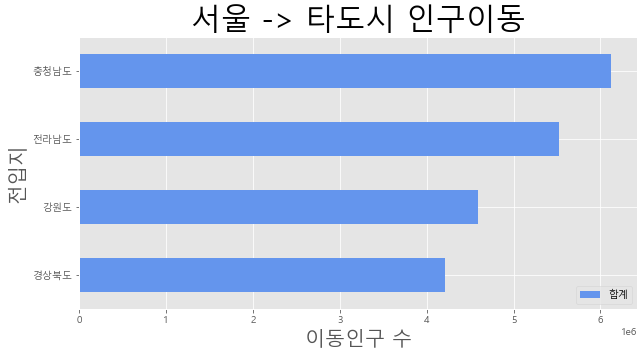

In [49]:
# 수직
plt.style.use('ggplot')
sr3_tot.plot(kind = 'barh', figsize = (10,5), width = 0.5, color='cornflowerblue') # alpha 투명도
plt.title('서울 -> 타도시 인구이동', size= 30)
plt.ylabel('전입지',size = 20)
plt.xlabel('이동인구 수',size = 20)
plt.legend(loc='best')
plt.show()

In [55]:
# 그림판 여러개 그래프 작성
col_years = list(map(str, range(2010, 2018))) # 문자열 리스트
sr6 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'], col_years]
sr6['합계'] = sr6.sum(axis=1)
# print(sr6[['합계']]) 데이터 프레임 여러개 중에 한개
# print(sr6['합계']) 시리즈 한열
# 합계 내림차순
sr6_tot = sr6[['합계']].sort_values(by='합계', ascending=True)
print(sr6_tot)

전입지
충청남도    179533.0
경상북도    117740.0
강원도     175731.0
전라남도    116035.0
Name: 합계, dtype: float64
            합계
전입지           
전라남도  116035.0
경상북도  117740.0
강원도   175731.0
충청남도  179533.0


# 수직 막대

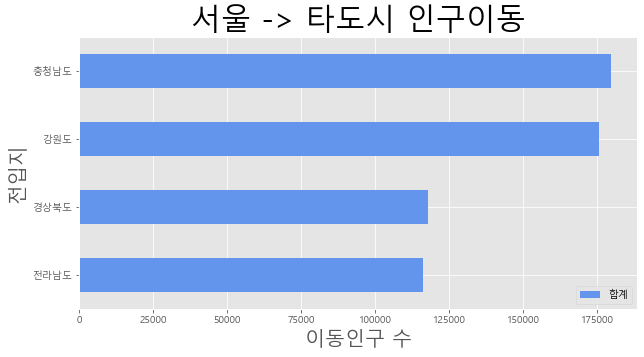

In [56]:
# 수직
plt.style.use('ggplot')
sr6_tot.plot(kind = 'barh', figsize = (10,5), width = 0.5, color='cornflowerblue') # alpha 투명도
plt.title('서울 -> 타도시 인구이동', size= 30)
plt.ylabel('전입지',size = 20)
plt.xlabel('이동인구 수',size = 20)
plt.legend(loc='best')
plt.show()

# 리스트데이터를 막대로 출력

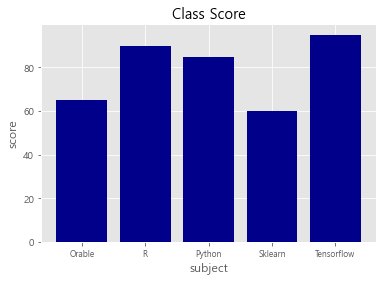

In [58]:
# 리스트데이터를 막대로 출력
import matplotlib.pyplot as plt

plt.style.use('ggplot')

subjects = ['Orable', 'R', 'Python','Sklearn', 'Tensorflow']
scores = [65,90,85,60,95]

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.bar(range(len(subjects)), scores, align = 'center', color = 'darkblue') # 수치 데이터 삽입

ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left') # 축 수치 위치
plt.xticks(range(len(subjects)), subjects, rotation = 0, fontsize = 'small') # 종류 데이터 삽입

plt.xlabel('subject') # 축 이름 
plt.ylabel('score')
plt.title('Class Score') # 제목

plt.savefig('bar_plot.png', dpi=400, bbox_inches='tight') # 저장
plt.show()

# 연합 막대 그리기

In [64]:
# 연합 막대 그리기
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력

# Excel 데이터 프레임으로 변환
df = pd.read_excel('남북한발전전력량.xlsx', engine='openpyxl')
df = df.loc[5:9]
df.drop('전력량 (억㎾h)', axis='columns', inplace = True)
df.set_index('발전 전력별', inplace=True)
df = df.T
print(df.head())

발전 전력별   합계   수력   화력 원자력
1990    277  156  121   -
1991    263  150  113   -
1992    247  142  105   -
1993    221  133   88   -
1994    231  138   93   -


# 증감율 변동률 계산

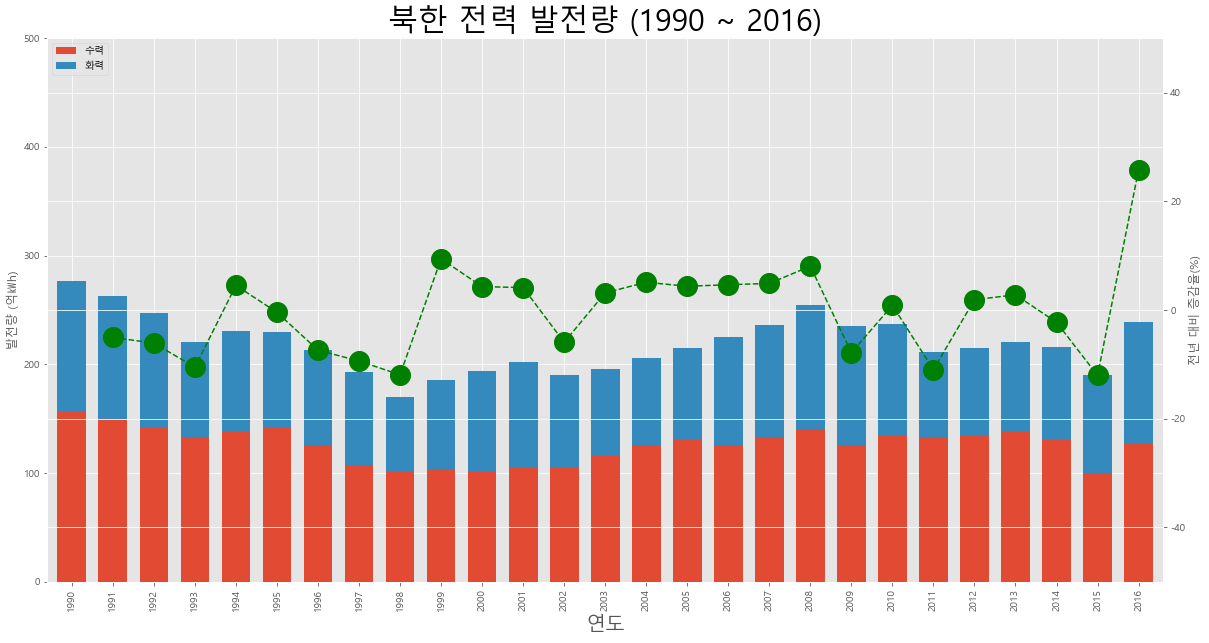

In [65]:
# 증감율 변동률 계산
df = df.rename(columns={'합계' : '총발전량'})
 # shift 앞의 값으로 내값을 가져와 // 그래서 맨 위값은 결측값, 가져올게 없어서
df['총발전량 - 1년'] = df['총발전량'].shift(1)
df['증감율'] = ((df['총발전량'] / df['총발전량 - 1년'])- 1) *100
# 2축 그래프 그리기
ax1 = df[['수력', '화력']].plot(kind='bar', figsize = (20,10), width=0.7, stacked=True)

ax2 = ax1.twinx() # 복사, 같은 영역인 것처럼
ax2.plot(df.index, df.증감율, ls='--', marker='o', markersize=20, color='green', label='전년대비 증감율(%)')
# ls -- 점선, marker 0, color green
ax1.set_ylim(0, 500)
ax2.set_ylim(-50, 50)
ax1.set_xlabel('연도', size=20)
ax1.set_ylabel('발전량 (억㎾h)')
ax2.set_ylabel('전년 대비 증감율(%)')
plt.title('북한 전력 발전량 (1990 ~ 2016)', size = 30)
ax1.legend(loc='upper left')

plt.show()

# 히스토그램

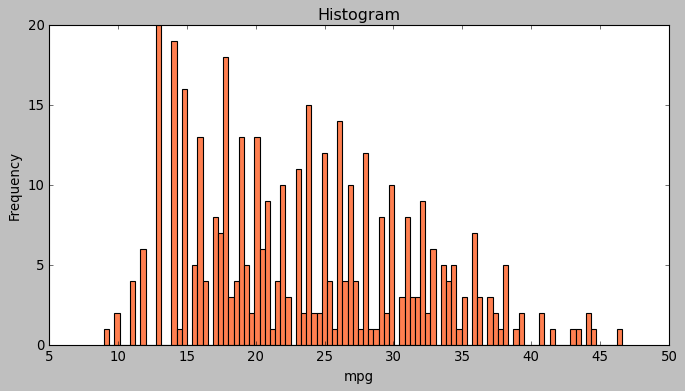

In [71]:
# 히스토그램
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('classic')
df= pd.read_csv('auto-mpg.csv', header = None)
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'name']
df['mpg'].plot(kind='hist', bins=100, color='coral', figsize = (10,5))
plt.title('Histogram')
plt.xlabel('mpg')
plt.show()

- plot(kind='hist') 히스토그램
- plot(kind='area') 면적
- plot(kind='bar') 막대
- plot(kind='barh') 수직 막대
- bins = 10 구간 10개

In [72]:
# 1 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
rc('font',family='Malgun Gothic')
df = pd.read_excel('시도별 전출입 인구수.xlsx',engine='openpyxl')
df = df.fillna(method='ffill')
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] == '전국')
df_seoul_out = df[mask]
df_seoul_out = df_seoul_out.drop(["전출지별"],axis=1)
df_seoul_out.rename(columns={'전입지별':'전입지'},inplace=True)
df_seoul_out.set_index('전입지',inplace=True)

mask2 = (df['전출지별'] == '전국') & (df['전입지별'] == '서울특별시')
df_seoul_in = df[mask2]
df_seoul_in = df_seoul_in.drop(["전입지별"],axis=1)
df_seoul_in.rename(columns={'전출지별':'전출지'},inplace=True)
df_seoul_in.set_index('전출지',inplace=True)

print(df_seoul_in.head())
print(df_seoul_out.head())


        1970     1971     1972     1973     1974     1975     1976     1977  \
전출지                                                                           
전국   1742813  1671705  1349333  1831858  2050392  3396662  2756510  2893403   

        1978     1979  ...     2008     2009     2010     2011     2012  \
전출지                    ...                                                
전국   3307439  2589667  ...  2025358  1873188  1733015  1721748  1555281   

        2013     2014     2015     2016     2017  
전출지                                               
전국   1520090  1573594  1589431  1515602  1472937  

[1 rows x 48 columns]
        1970     1971     1972     1973     1974     1975     1976     1977  \
전입지                                                                           
전국   1448985  1419016  1210559  1647268  1819660  2937093  2495620  2678007   

        1978     1979  ...     2008     2009     2010     2011     2012  \
전입지                    ...                     

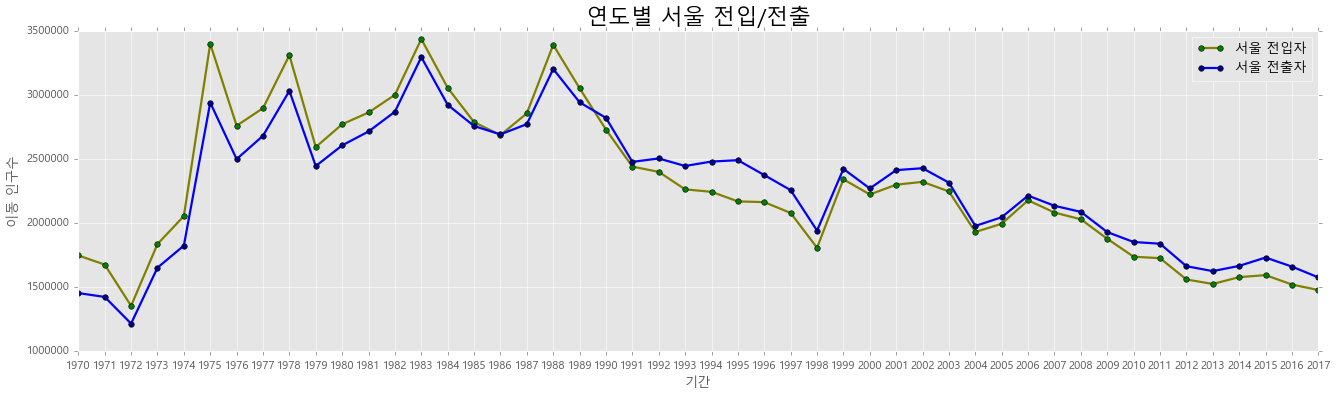

In [73]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1) 
ax.plot(df_seoul_in.loc['전국',:],marker='o',markerfacecolor='green',markersize=5,color='olive', \
linewidth=2, label='서울 전입자')
ax.plot(df_seoul_out.loc['전국',:],marker='o',markerfacecolor='darkblue',markersize=5,color='blue', \
linewidth=2, label='서울 전출자')
ax.legend(loc='best')
ax.set_title('연도별 서울 전입/전출',size = 20)
ax.set_xlabel('기간',size=12)
ax.set_ylabel('이동 인구수',size=12)
ax.tick_params(axis='x',labelsize=10) 
ax.tick_params(axis='y',labelsize=10)

In [75]:
# 2 
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font',family=font_name)

df = pd.read_excel('시도별 전출입 인구수.xlsx', engine='openpyxl')
df = df.fillna(method='ffill')
mask = ((df['전출지별'] == '서울특별시') & (df['전입지별'] == '전국')) |\
((df['전출지별']=='전국') & (df['전입지별'] == '서울특별시'))
df_seoul = df[mask]
df_seoul = df_seoul.drop('전출지별',axis=1)
df_seoul.rename(columns={'전입지별':'전입지'}, inplace =True)
df_seoul.set_index('전입지',inplace=True)
df_seoul = df_seoul.T
df_seoul.rename(columns={'서울특별시':'전입'},inplace=True)
df_seoul.rename(columns={'전국':'전출'}, inplace=True)
df_seoul['증감율'] =((df_seoul['전입'] / df_seoul['전출']) - 1) * 100

C:\Users\pc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


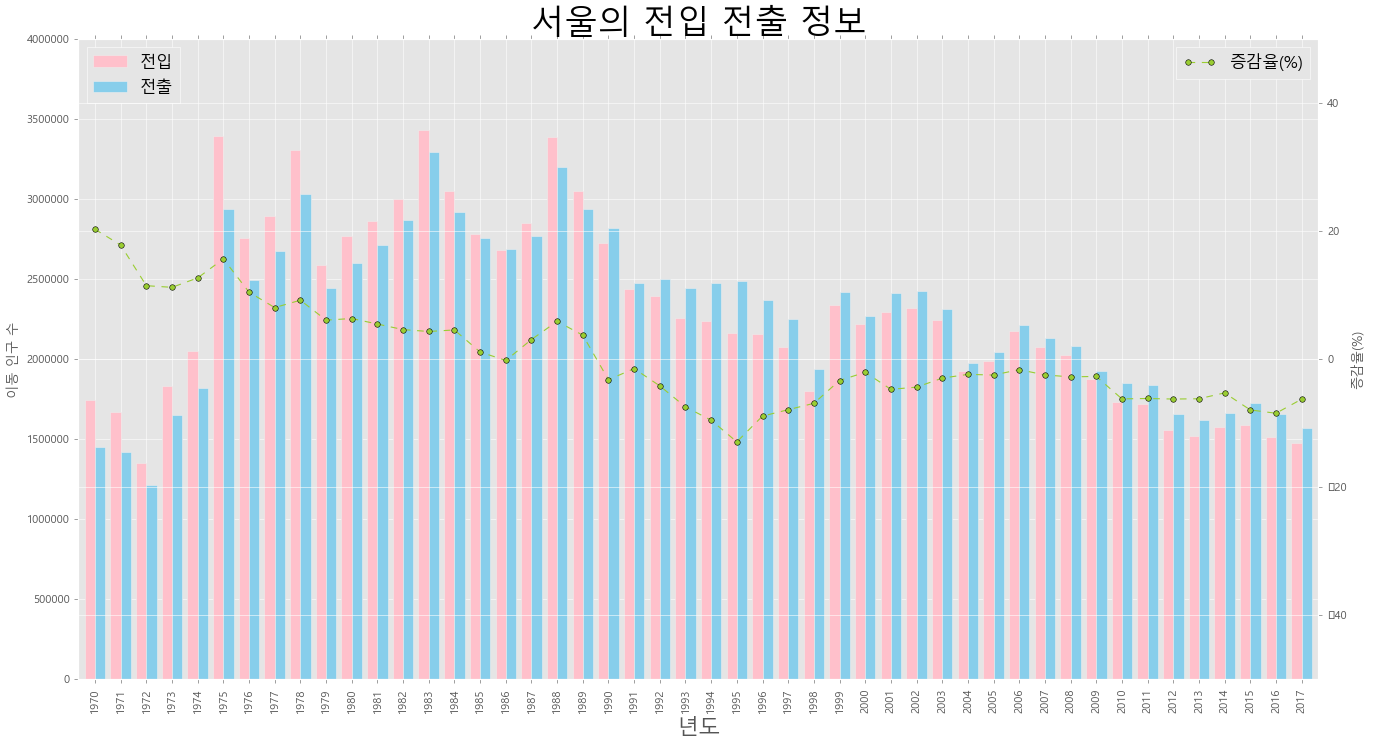

In [76]:
plt.style.use('ggplot')
ax1 = df_seoul[['전입','전출']].plot(kind='bar',figsize=(20,10), width=0.8, color=['pink','skyblue'])
ax2 = ax1.twinx()
ax2.plot(df_seoul.index, df_seoul.증감율, ls='--', marker='o', markersize=5,
color='yellowgreen', label='증감율(%)')
ax1.set_ylim(0,4000000)
ax2.set_ylim(-50,50)
ax1.set_xlabel('년도',size=20)
ax1.set_ylabel('이동 인구 수')
ax2.set_ylabel('증감율(%)')
plt.title('서울의 전입 전출 정보',size=30)
ax1.legend(loc='upper left',fontsize=15)
ax2.legend(loc='upper right', fontsize=15)
plt.show()

In [77]:
# 3
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font',family=font_name)

plt.style.use('ggplot')
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_excel('남북한발전전력량.xlsx', engine='openpyxl')
df = df.loc[0:4]
df.drop('전력량 (억㎾h)',axis='columns', inplace=True)
df.set_index('발전 전력별', inplace=True)
df = df.T
print(df.head())
print(df.tail())
df = df.rename(columns={'합계':'총발전량'})
df['총발젼량 - 1년'] = df['총발전량'].shift(1)
df['증감율'] = ((df['총발전량'] / df['총발젼량 - 1년']) - 1) * 100

발전 전력별    합계  수력    화력  원자력 신재생
1990    1077  64   484  529   -
1991    1186  51   573  563   -
1992    1310  49   696  565   -
1993    1444  60   803  581   -
1994    1650  41  1022  587   -
발전 전력별    합계  수력    화력   원자력  신재생
2012    5096  77  3430  1503   86
2013    5171  84  3581  1388  118
2014    5220  78  3427  1564  151
2015    5281  58  3402  1648  173
2016    5404  66  3523  1620  195


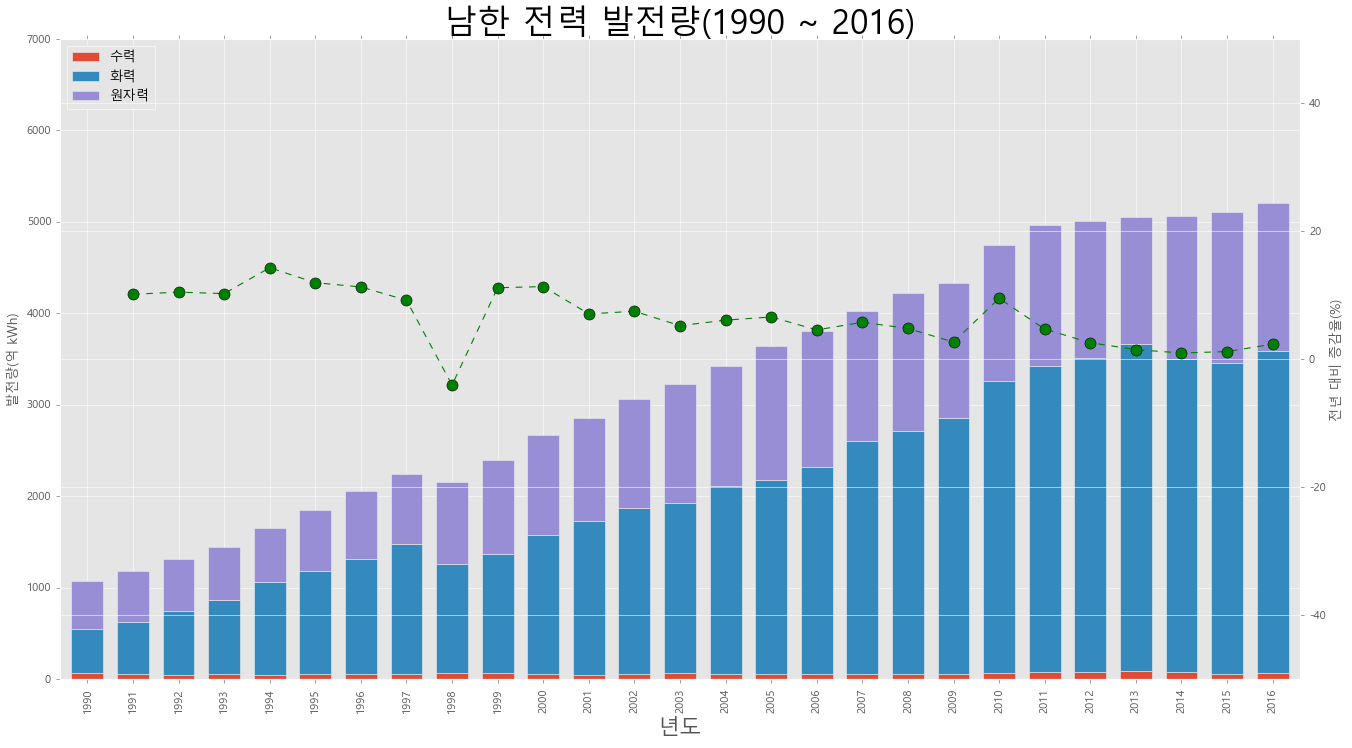

In [78]:

ax1 = df[['수력','화력','원자력']].plot(kind='bar', figsize=(20,10), width = 0.7, stacked=True)
ax2 = ax1.twinx()
ax2.plot(df.index, df.증감율, ls='--', marker='o', markersize=10,
color='green', label='전년대비 증감율(%)')
ax1.set_ylim(0,7000)
ax2.set_ylim(-50,50)
ax1.set_xlabel('년도',size=20)
ax1.set_ylabel('발전량(억 kWh)')
ax2.set_ylabel('전년 대비 증감율(%)')
plt.title('남한 전력 발전량(1990 ~ 2016)', size= 30)
ax1.legend(loc='upper left')
plt.show()